Datasets can be downloaded [here](https://www.dropbox.com/sh/gpxyvz0ge7fw68s/AADy9kn66oqfF9ycd64LH9cTa?dl=0).   
**This dataset has been normalized.**   

Ref: Nestorowa, S. et al. A single-cell resolution map of mouse hematopoietic stem and progenitor cell differentiation. Blood 128, e20-31 (2016).

In [2]:
import stream as st
st.__version__

'1.0'

In [3]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

#### Read in data

In [4]:
adata=st.read(file_name='./data_Nestorowa.tsv.gz',workdir='./stream_result')

Saving results in: ./stream_result


> **To load and use 10x Genomics single cell RNA-seq data processed with Cell Ranger:**   
(*The variable index can be reset by choosing a different column in `gene.tsv`*)
```python
adata=st.read(file_name='./filtered_gene_bc_matrices/matrix.mtx',
              file_feature='./filtered_gene_bc_matrices/genes.tsv',
              file_sample='./filtered_gene_bc_matrices/barcodes.tsv',
              file_format='mtx',workdir='./stream_result')    
adata.var.index = adata.var[1].values   
```

> **If the Anndata object is already created, to run STREAM, please simply specify work directory:**
```python
st.set_workdir(adata,'./stream_result')
```

In [5]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [6]:
adata

AnnData object with n_obs × n_vars = 1656 × 4768
    uns: 'workdir'

#### Read in metadata

*if `file_name` is not specified, 'unknown' will be genereated for cell label and random color will be used for each label*

In [7]:
st.add_cell_labels(adata,file_name='./cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color.tsv.gz')

> **Alternatively, the step can be merged into one step:**  
```python
st.add_metadata(adata,file_name='./metadata.tsv')
```

#### Calculate QC

In [8]:
st.cal_qc(adata,assay='rna')
st.filter_features(adata,min_n_cells = 5)

Filter genes based on min_n_cells
After filtering out low-expressed genes: 
1656 cells, 4764 genes


```python
###Filter cells and features
st.filter_cells(adata,min_n_features= 100)
st.filter_features(adata,min_n_cells = 5)
```


```python
###Normalize gene expression based on library size  
st.normalize(adata,method='lib_size')
###Logarithmize gene expression 
st.log_transform(adata)
###Remove mitochondrial genes 
st.remove_mt_genes(adata)
```

#### Feature selection

Please check if the blue curve fits the points well. If not, please adjust the parameter **'loess_frac'** (usually by lowering it) until the blue curve fits well. 

239 variable genes are selected


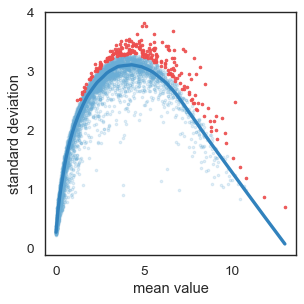

In [9]:
st.select_variable_genes(adata,loess_frac=0.1)

**Alternatively, user can also select top  principal components using all genes or variable genes:**
- use all genes   
`st.select_top_principal_components(adata,n_pc=15,first_pc=True)`
- use variable genes   
    - users need to first run `st.select_variable_genes(adata,loess_frac=0.01, n_genes=2000)`  
    - `st.select_top_principal_components(adata,feature='var_genes',n_pc=40,first_pc=True)`

#### Dimension reduction

In [11]:
st.dimension_reduction(adata,method='se',feature='var_genes', n_neighbors=50,n_components=4,n_jobs=2)

feature var_genes is being used ...
2 cpus are being used ...


> **Alternatively, using top principal components as features:**
`st.dimension_reduction(adata,method='se',feature='top_pcs',n_neighbors=15, n_components=2)`

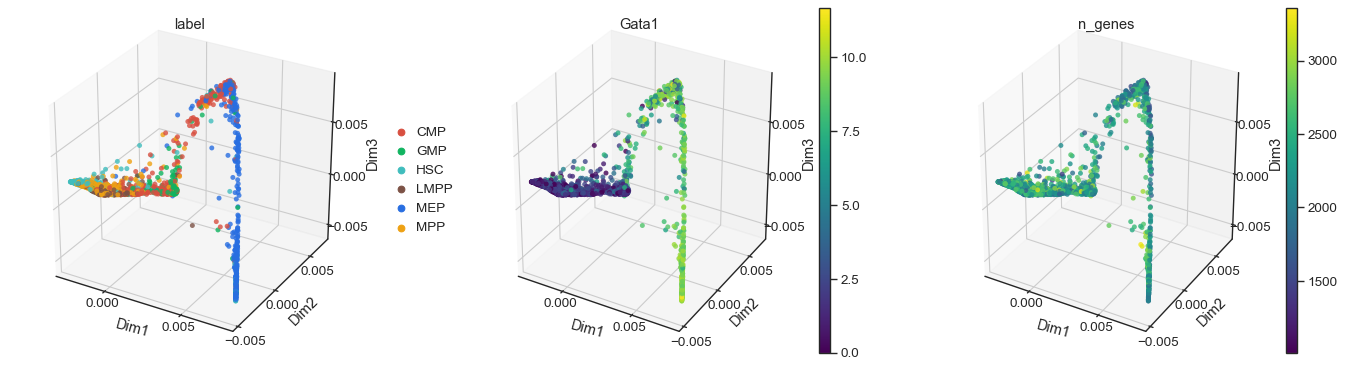

In [12]:
st.plot_dimension_reduction(adata,color=['label','Gata1','n_genes'],
                            n_components=3,show_graph=False,show_text=False)

#### Visualize cells on 2D plane when `n_components>=3` in `st.dimension_reduction()`

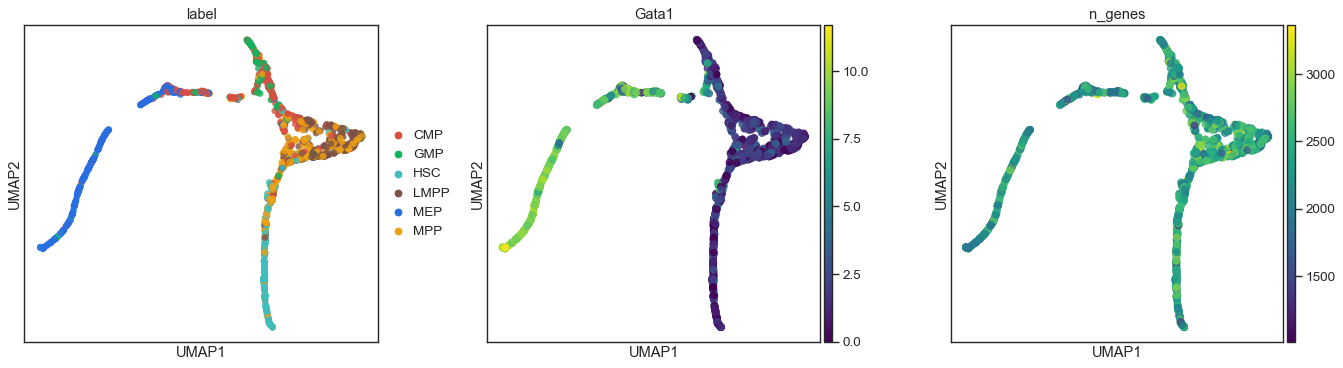

In [13]:
st.plot_visualization_2D(adata,method='umap',n_neighbors=50,
                         color=['label','Gata1','n_genes'],use_precomputed=False)

#### Trajectory inference

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


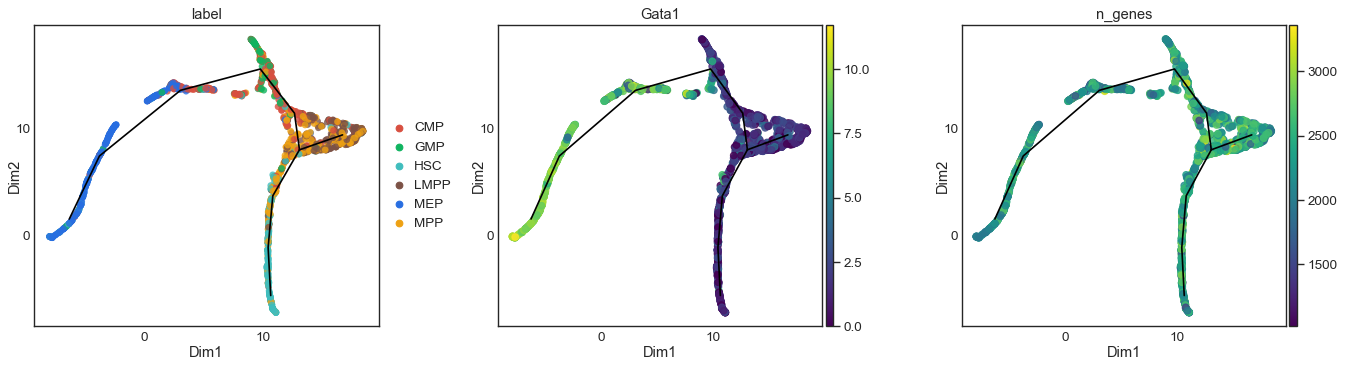

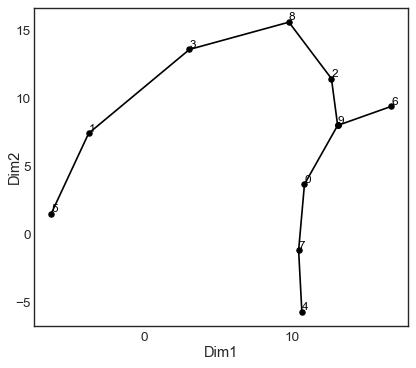

In [14]:
### by setting use_vis=True, we use the manifold from `plot_visualization_2D()` to infer trajectories
st.seed_elastic_principal_graph(adata,n_clusters=10,use_vis=True)
st.plot_dimension_reduction(adata,color=['label','Gata1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)` 

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 1656 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||50
	
1.032
	
50
	
49
	
44
	
2
	
0
	
0
	
0.3273
	
0.2369
	
0.9963
	
0.9973
	
0.6326
	
0.07197
	
3.599
	
179.9
	
0


9.254 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 5


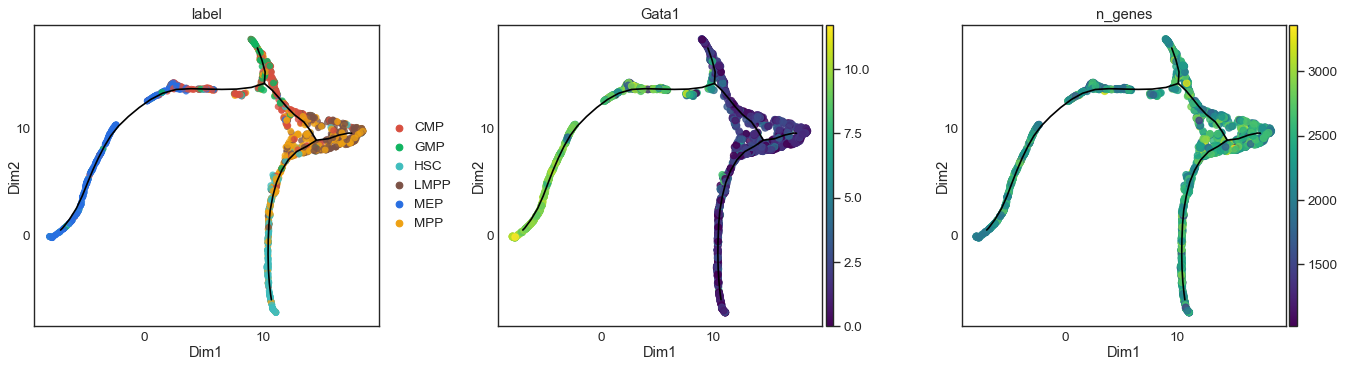

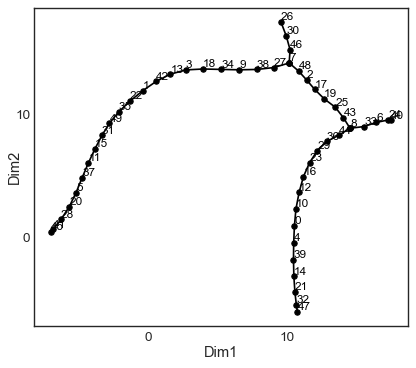

In [15]:
st.elastic_principal_graph(adata,epg_alpha=0.01,epg_mu=0.05,epg_lambda=0.01)
st.plot_dimension_reduction(adata,color=['label','Gata1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

#### Adjusting trajectories (optional)

* Finetune branching event:  
```python
st.optimize_branching(adata,incr_n_nodes=30)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```
* Prune trivial branches:  
```python
st.prune_elastic_principal_graph(adata,epg_collapse_mode='EdgesNumber',epg_collapse_par=2)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

* Shift branching node:  
```python
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

Extending leaves with additional nodes ...
Number of branches after extending leaves: 5


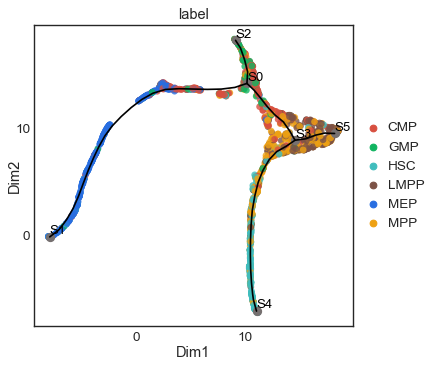

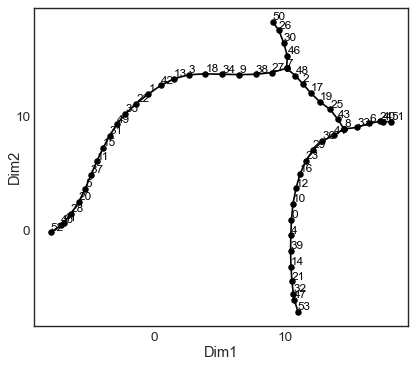

In [16]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label'],n_components=2,show_graph=True,show_text=True,)
st.plot_branches(adata,show_text=True)

#### Trajectory visualization

##### flat tree

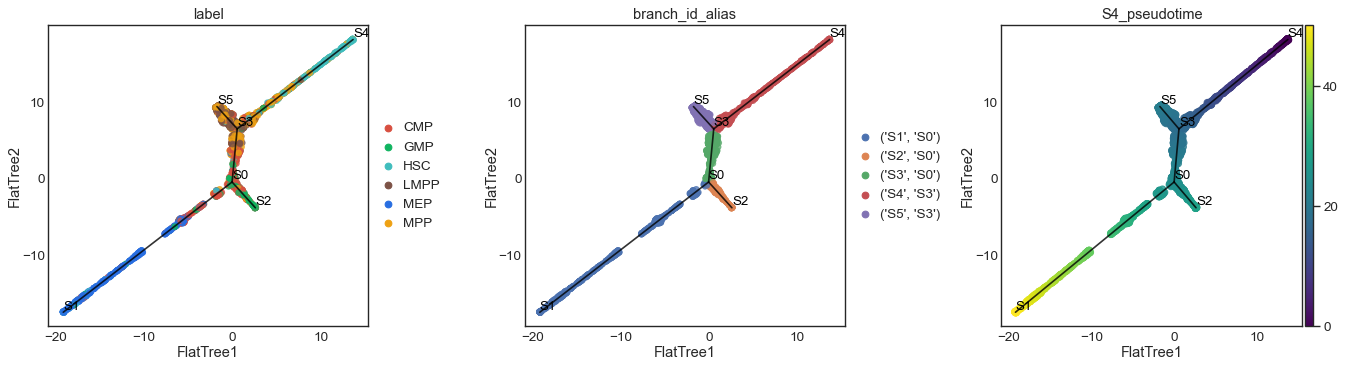

In [17]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S4_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

##### stream plot at single cell level

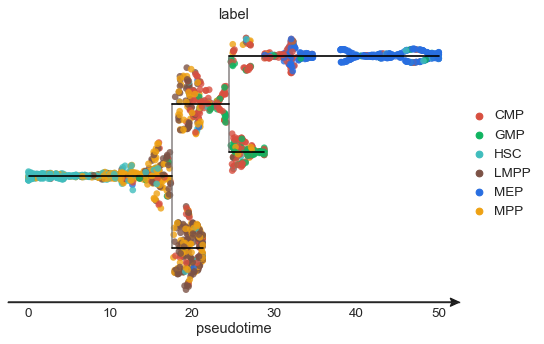

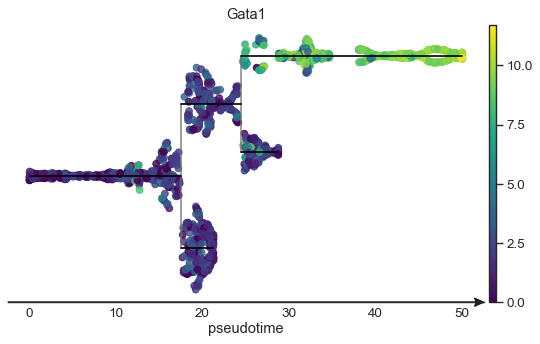

In [18]:
st.plot_stream_sc(adata,root='S4',color=['label','Gata1'],
                  dist_scale=0.5,show_graph=True,show_text=False)

##### stream plots

**Some useful parameters to finetune the appearance of stream plots:**
* `dist_scale`: controls the width of STREAM plot branches.
* `factor_num_win`: controls the resolution of STREAM plot.
* `preference`: controls the order of branches
* `log_scale`: shows stream plot in log scale to zoom in on thin branches

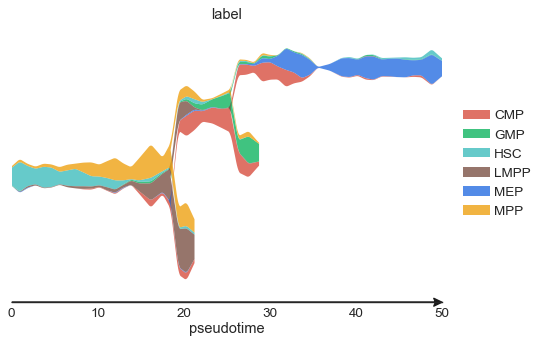

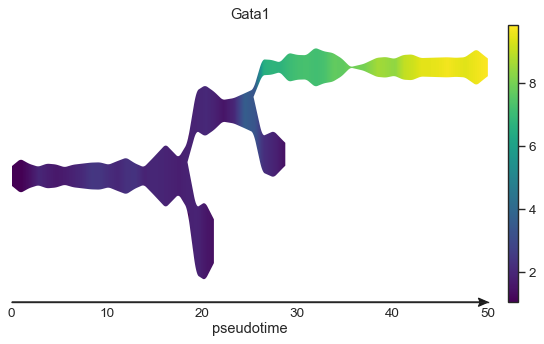

In [19]:
st.plot_stream(adata,root='S4',color=['label','Gata1'])

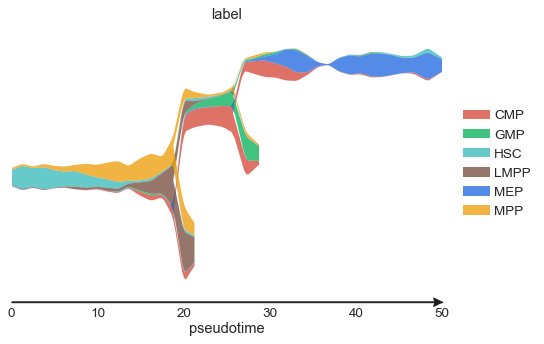

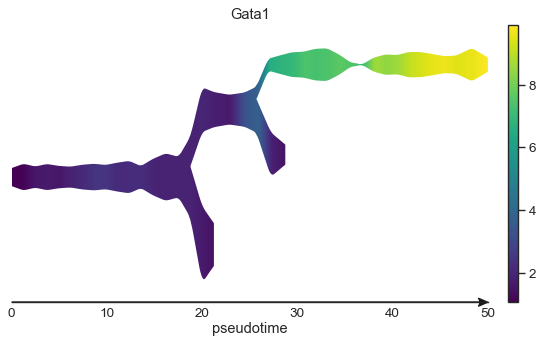

In [20]:
st.plot_stream(adata,root='S4',color=['label','Gata1'],factor_min_win=1.5)

#### Save results

In [21]:
st.write(adata,file_name='stream_result.pkl')